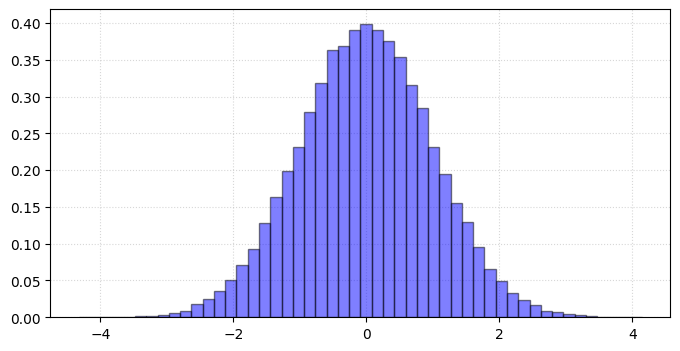

Точечная оценка математического ожидания:  -0.006716276487379768
Точечная оценка дисперсии:  1.0019834625890247
При 0.9 интервальная оценка матожидания: (-0.014079713534129852, 0.0006471605593703165)
При 0.9 интервальная оценка дисперсии: (-1.6532308549447285, 1.639798301969969)


In [1]:
import numpy as np
import random
from pynverse import inversefunc
import matplotlib.pyplot as plt
from scipy.stats import norm, t, sem


# TASK 1
amount_of_numbers: int = 50000
a: float = 1.00
b: float = 5.00
u: list[float] = [random.random() for _ in range(amount_of_numbers)]

distribution_function = norm.cdf
inverse_function = inversefunc(distribution_function)

values = np.array([inverse_function(val) for val in u])
N: int = len(values)

# Histogram
plt.figure(figsize=(8, 4))
plt.hist(values, bins=50, color='blue', density=True, edgecolor='k', label='Distribution', alpha=0.5, zorder=2)
plt.grid(which='both', linestyle='dotted', alpha=0.5)
plt.show()


# Marks

# точечная оценка
# http://datalearning.ru/index.php/textbook?cid=1&mid=1&topic=2
mu: float = values.mean()
dx: float = ((values - mu) ** 2).sum() / (N - 1)
print('Точечная оценка математического ожидания: ', mu)
print('Точечная оценка дисперсии: ', dx)


# интервальные оценки (доверительный интервал)

confidence_level = 0.9 # Задаем уровень доверия
sample_standard_error: float = sem(values) # # Вычисляем стандартную ошибку выборки
t_value = t.ppf((1 + confidence_level) / 2, N - 1) # Вычисляем t-значение для заданного уровня доверия и степеней свободы
confidence_interval = (mu - t_value * sample_standard_error, mu + t_value * sample_standard_error) # Вычисляем интервальную оценку матожидания
print(f'При {confidence_level} интервальная оценка матожидания: {confidence_interval}')

standard_derivation = np.std(values, ddof=1)
h = standard_derivation * t.ppf((1 + confidence_level) / 2, N - 1)
print(f'При {confidence_level} интервальная оценка дисперсии: {(mu - h, mu + h)}')

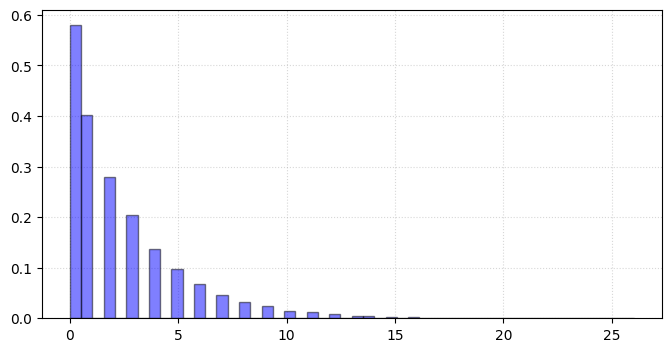

При 0.95 Точечная оценка матожидания:  2.32824
При 0.95 Точечная оценка дисперсии:  7.759493692273845
0.95% интервальная оценка матожидания: [2.260224642252581, 2.3962553577474193]


In [2]:
import random
import math
from scipy.stats import t, geom
# TASK 2

def geometric(p: float) -> int:
    return int(math.log(1.0 - random.random()) / math.log(1.0 - p))

values_amount: int = 50000
p: float = 0.3
values: list[int] = []

for count in range(0, values_amount):
    values.append(geometric(p))

# Histogram
plt.figure(figsize=(8, 4))
plt.hist(values, bins=50, color='blue', density=True, edgecolor='k', label='Distribution', alpha=0.5, zorder=2)
plt.grid(which='both', linestyle='dotted', alpha=0.5)
plt.show()


N: int = len(values)
mu: float = (np.array(values)).mean()
sigma: float = ((values - mu) ** 2).sum() / (N - 1)

beta = 0.95
gamma = (1 + beta) / 2
t_gamma = t.ppf(gamma, N-1)

low_mu = mu - sigma / np.sqrt(N) * t_gamma
upper_mu = mu + sigma / np.sqrt(N) * t_gamma

print(f'При {beta} Точечная оценка матожидания: ', mu)
print(f'При {beta} Точечная оценка дисперсии: ', sigma)

print(f"{beta}% интервальная оценка матожидания: [{low_mu}, {upper_mu}]")